# Neptune and Pluto
## Setting up a 3-body simulation
The next simulation you will run will be a "three-body" simulation - namely a central star and two orbiting planets.  We will again use the Solar System, but this time use the outer planets Neptune and Pluto (Pluto is technically classed as a "dwarf" planet, but this nomenclature will not effect the simulation!).  Now the simulator needs to calculate the gravitational forces between the Sun and each planets as well as the gravitational forces between two planets themselves.  As before you start by importing the `python` modules that we need, setting up the simulation with appropriate units, and defining the Sun as the central star in our simulation.  These code lines should be familar from the previous Sun-Earth simulation. 

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import time

#%matplotlib notebook

sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'kg')
sim.t = 0.0

msun = 1.989e30
sim.add(m=msun, x=0, y=0, z=0, vx=0, vy=0 ,vz=0)

For the Sun-Earth simulation in the previous section you added Earth by specifying the Earth's position and velocity in $(x,y)$ coordinates.  However you can also add planets to a simulation by specifying the elements of the planet's orbit.  To do this we need to specify the semi-major axis ($a$), the eccentricity ($e$) and the true anomoly($f$).  We will add Neptune and Pluto to this simulation in this way.

In [2]:
m_Neptune = 1e26
a_Neptune = 30.11
e_Neptune = 0.009
f_Neptune = 0.0

m_Pluto = 1.3e22
a_Pluto = 39.482
e_Pluto = 0.2488
f_Pluto = 0.0

sim.add(m=m_Neptune,a=a_Neptune, e=e_Neptune, f=np.deg2rad(f_Neptune))
sim.add(m=m_Pluto,a=a_Pluto, e=e_Pluto, f=np.deg2rad(f_Pluto))

sim.move_to_com()

Now you can again visualise these orbits by using the `rebound` OrbitPlot command.  This time it is useful to assign different colours to the different planetary orbits.

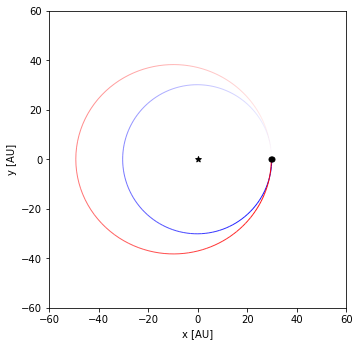

In [3]:
fig, ax = rebound.OrbitPlot(sim, orbit_type='trail', color=['blue','red'],
                            xlim=(-60,60), ylim=(-60,60), unitlabel='[AU]')
fig.tight_layout()

Although the orbit of Pluto has a much large semi-major axis than the orbit of Neptune, the orbital eccentricity of Pluto is so high that the orbits actually cross (you may need to zoom in on the plot to see this).

Now you can again make an array of timesteps, so that we can run the simulation over a series of times and plot the output.  This time you should keep track of the semi-major axis and eccentricity for each planet.  In the example below you will have 1000 time steps between 0 and 1 million years.  Since 1 million years is quite a long simulation, a timer has been added to check how long the simulation takes (the compute time).

In [4]:
times = np.linspace(0, 1e6, 1000)

#Making the empty arrays in preparation for the simulation output
a_Neptune_time = np.array([])
e_Neptune_time = np.array([])
a_Pluto_time = np.array([])
e_Pluto_time = np.array([])

start_time = time.process_time() # Starting the compute timer

#Looping over the arry of times, and outputing the planet orbits at each timestep.
for t in times:
    sim.integrate(t)
    a_Neptune_time = np.append(a_Neptune_time, sim.particles[1].a )
    e_Neptune_time = np.append(e_Neptune_time, sim.particles[1].e )
    a_Pluto_time = np.append(a_Pluto_time, sim.particles[2].a )
    e_Pluto_time = np.append(e_Pluto_time, sim.particles[2].e )

print("Simulation completed in ",time.process_time() - start_time, "seconds") #Outputing the compute time.

Simulation completed in  4.671441 seconds


Now you can plot the orbits after the end of the simulation (i.e. in 1 million years time) to see how they look.

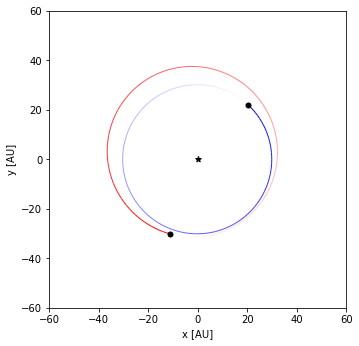

In [5]:
fig, ax = rebound.OrbitPlot(sim, orbit_type='trail', color=['blue','red'],
                            xlim=(-60,60), ylim=(-60,60), unitlabel='[AU]')
fig.tight_layout()

As you can see, the orbits now look different.  In particular Pluto is on quite a different orbit.  You can look at how the orbits have evolved by plotting the various orbital properties against time for the duration of the simulation.

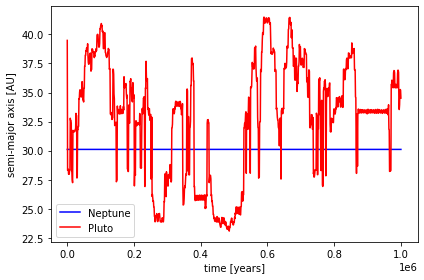

In [6]:
fig, ax = plt.subplots()
ax.plot(times, a_Neptune_time, color='blue', label='Neptune')
ax.plot(times, a_Pluto_time, color='red', label='Pluto')
ax.set_xlabel('time [years]')
ax.set_ylabel('semi-major axis [AU]')
ax.legend()
fig.tight_layout()

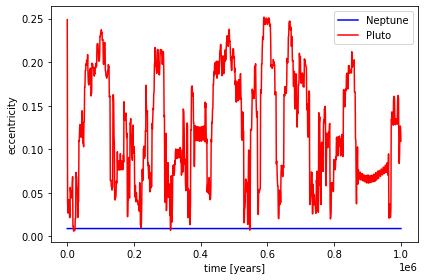

In [7]:
fig, ax = plt.subplots()
ax.plot(times, e_Neptune_time, color='blue', label='Neptune')
ax.plot(times, e_Pluto_time, color='red', label='Pluto')
ax.set_xlabel('time [years]')
ax.set_ylabel('eccentricity')
ax.legend()
fig.tight_layout()

The plots reveal that while Neptune's orbit remain stable, the orbit of Pluto is rather chaotic, with the eccentricity and semi-major axis undergoing large and non-periodic variations.

## Compute Times
You may have noticed that the simulation takes longer to run than the Earth simulation did.  This is because with two planets there are more calculations to make in each time step.  It is important that you investigate how long a simulation will take to run (the "compute" time), as this is an important aspect of running a successful simulation.

Re-run the Neptune/Pluto simulation for a range of different simulation times.  We suggest you try simulations between about 100 years and 10 million years.  For each simulation note the compute time it took to run each simulation.  Plot the simulation time (in years) against the compute time (in seconds).  You should try to find a relationship between these times. 

## Starting conditions
So far you have started these simulations with both Neptune and Pluto with true anomolies of $f=0$.  This means the planets are very close to each other at the start of the simulation.  However if you start the planets further apart then the simulation may turn out differently.

Run a 1 million year simulation for a range of initial conditions by varying the initial true ananomly ($f$) of Pluto between 0 and 180 degrees.  For each simulation make a note of the range of Pluto's semi-major axis and eccentricity.  Also make a note of the computing times for each run.  

You should think about which of these simulation shows stable orbits, and which are not stable.  Why are there these differences?  You also need to think about why the computing times are varying for these simulations even though the simulation times remain as 1 million years for each simulation?

## Planet masses
Finally you should investigate the effect of increasing the mass of the planets.  Try making Neptune x10, x100, and x1000 more massive than the real Neptune.  Then do the same for Pluto.  Remember you should keep other parts of the simulation the same i.e. the same simulation time and same starting conditions.  We suggest selecting a simulation time of 1 million years and a starting condition which was stable.

What is the effect of changing the planet masses on the outcomes of the simulations?  Also, how does changing the masses effect the compute times?